In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/UrielBender/BigData/master/DataSets/diabetes.csv')
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   appt                      768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   SkinThickness             768 non-null    int64  
 8   a1c                       768 non-null    float64
 9   Age                       768 non-null    int64  
 10  Outcome                   768 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 66.1 KB


In [3]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure      appt  Insulin   BMI  \
0            6      148             72  0.016301        0  33.6   
1            1       85             66  0.344987        0  26.6   
2            8      183             64  0.378963        0  23.3   
3            1       89             66  0.783727       94  28.1   
4            0      137             40  0.370406      168  43.1   

   DiabetesPedigreeFunction  SkinThickness       a1c  Age  Outcome  
0                     0.627             35  9.033109   50        1  
1                     0.351             29  1.105190   31        0  
2                     0.672              0  2.377655   32        1  
3                     0.167             23  6.783883   21        0  
4                     2.288             35  4.831895   33        1

# Data Preparation

In [4]:
diabetes_df.Insulin.value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [5]:
# replace 0 with mean for insulin level
insu_mean = round(diabetes_df.Insulin.mean())
diabetes_df.Insulin.replace(0, insu_mean, inplace=True)
diabetes_df.Insulin.value_counts()

80     374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [6]:
# check for Nans
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
appt                        0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
SkinThickness               0
a1c                         0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_df.drop('Insulin', axis=1,inplace=True)

# EDA

In [8]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure        appt         BMI  \
count   768.000000  768.000000     768.000000  768.000000  768.000000   
mean      3.845052  120.894531      69.105469    0.499944   31.992578   
std       3.369578   31.972618      19.355807    0.286516    7.884160   
min       0.000000    0.000000       0.000000    0.000098    0.000000   
25%       1.000000   99.000000      62.000000    0.255590   27.300000   
50%       3.000000  117.000000      72.000000    0.494833   32.000000   
75%       6.000000  140.250000      80.000000    0.733105   36.600000   
max      17.000000  199.000000     122.000000    0.999744   67.100000   

       DiabetesPedigreeFunction  SkinThickness         a1c         Age  \
count                768.000000     768.000000  768.000000  768.000000   
mean                   0.471876      20.536458    5.014949   33.240885   
std                    0.331329      15.952218    2.841433   11.760232   
min                    0.078000       0.000000    0.012376   21.000000   
25%                    0.243750       0.000000    2.517396   24.000000   
50%                    0.372500      23.000000    5.140862   29.000000   
75%                    0.626250      32.000000    7.464107   41.000000   
max                    2.420000      99.000000    9.982058   81.000000   

          Outcome  
count  768.000000  
mean     0.338542  
std      0.473522  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [9]:
diabetes_count = diabetes_df.Outcome.value_counts()
diabetes_count

0    508
1    260
Name: Outcome, dtype: int64

In [10]:
percentage = [str(round(dia/diabetes_count.sum(),2)*100) + '%' for dia in diabetes_count]

In [11]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['No','Yes'],y=diabetes_count,marker_color=['blue','orange'], text=percentage, 
                     textposition='outside'))
fig.update_layout(title='Diabetes detection', yaxis_title='Number of cases')
fig.show()

In [12]:
ages = diabetes_df.pivot_table(index=['Age'], values=['Outcome']) # pivot table use mean
ages['No'] = 1 - ages.Outcome
ages.columns = ['Yes', 'No']
ages.head()

Yes        No
Age                    
21   0.079365  0.920635
22   0.138889  0.861111
23   0.157895  0.842105
24   0.173913  0.826087
25   0.250000  0.750000

In [13]:
ages = ages.round(3)
ages.head()

Yes     No
Age              
21   0.079  0.921
22   0.139  0.861
23   0.158  0.842
24   0.174  0.826
25   0.250  0.750

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(x=ages.index,y=ages.No, name='No Diabetes'))
fig.add_trace(go.Bar(x=ages.index,y=ages.Yes, name='Diabetes'))

fig.update_layout(
    title_text='Distribution of ages',
    xaxis_title_text = 'Age',
    yaxis_title_text = 'Count',
    bargap=0.2,
    barmode='stack'
)
fig.show()
# Inference: Diabetes manifestrs more often in cases of age 35 to 60

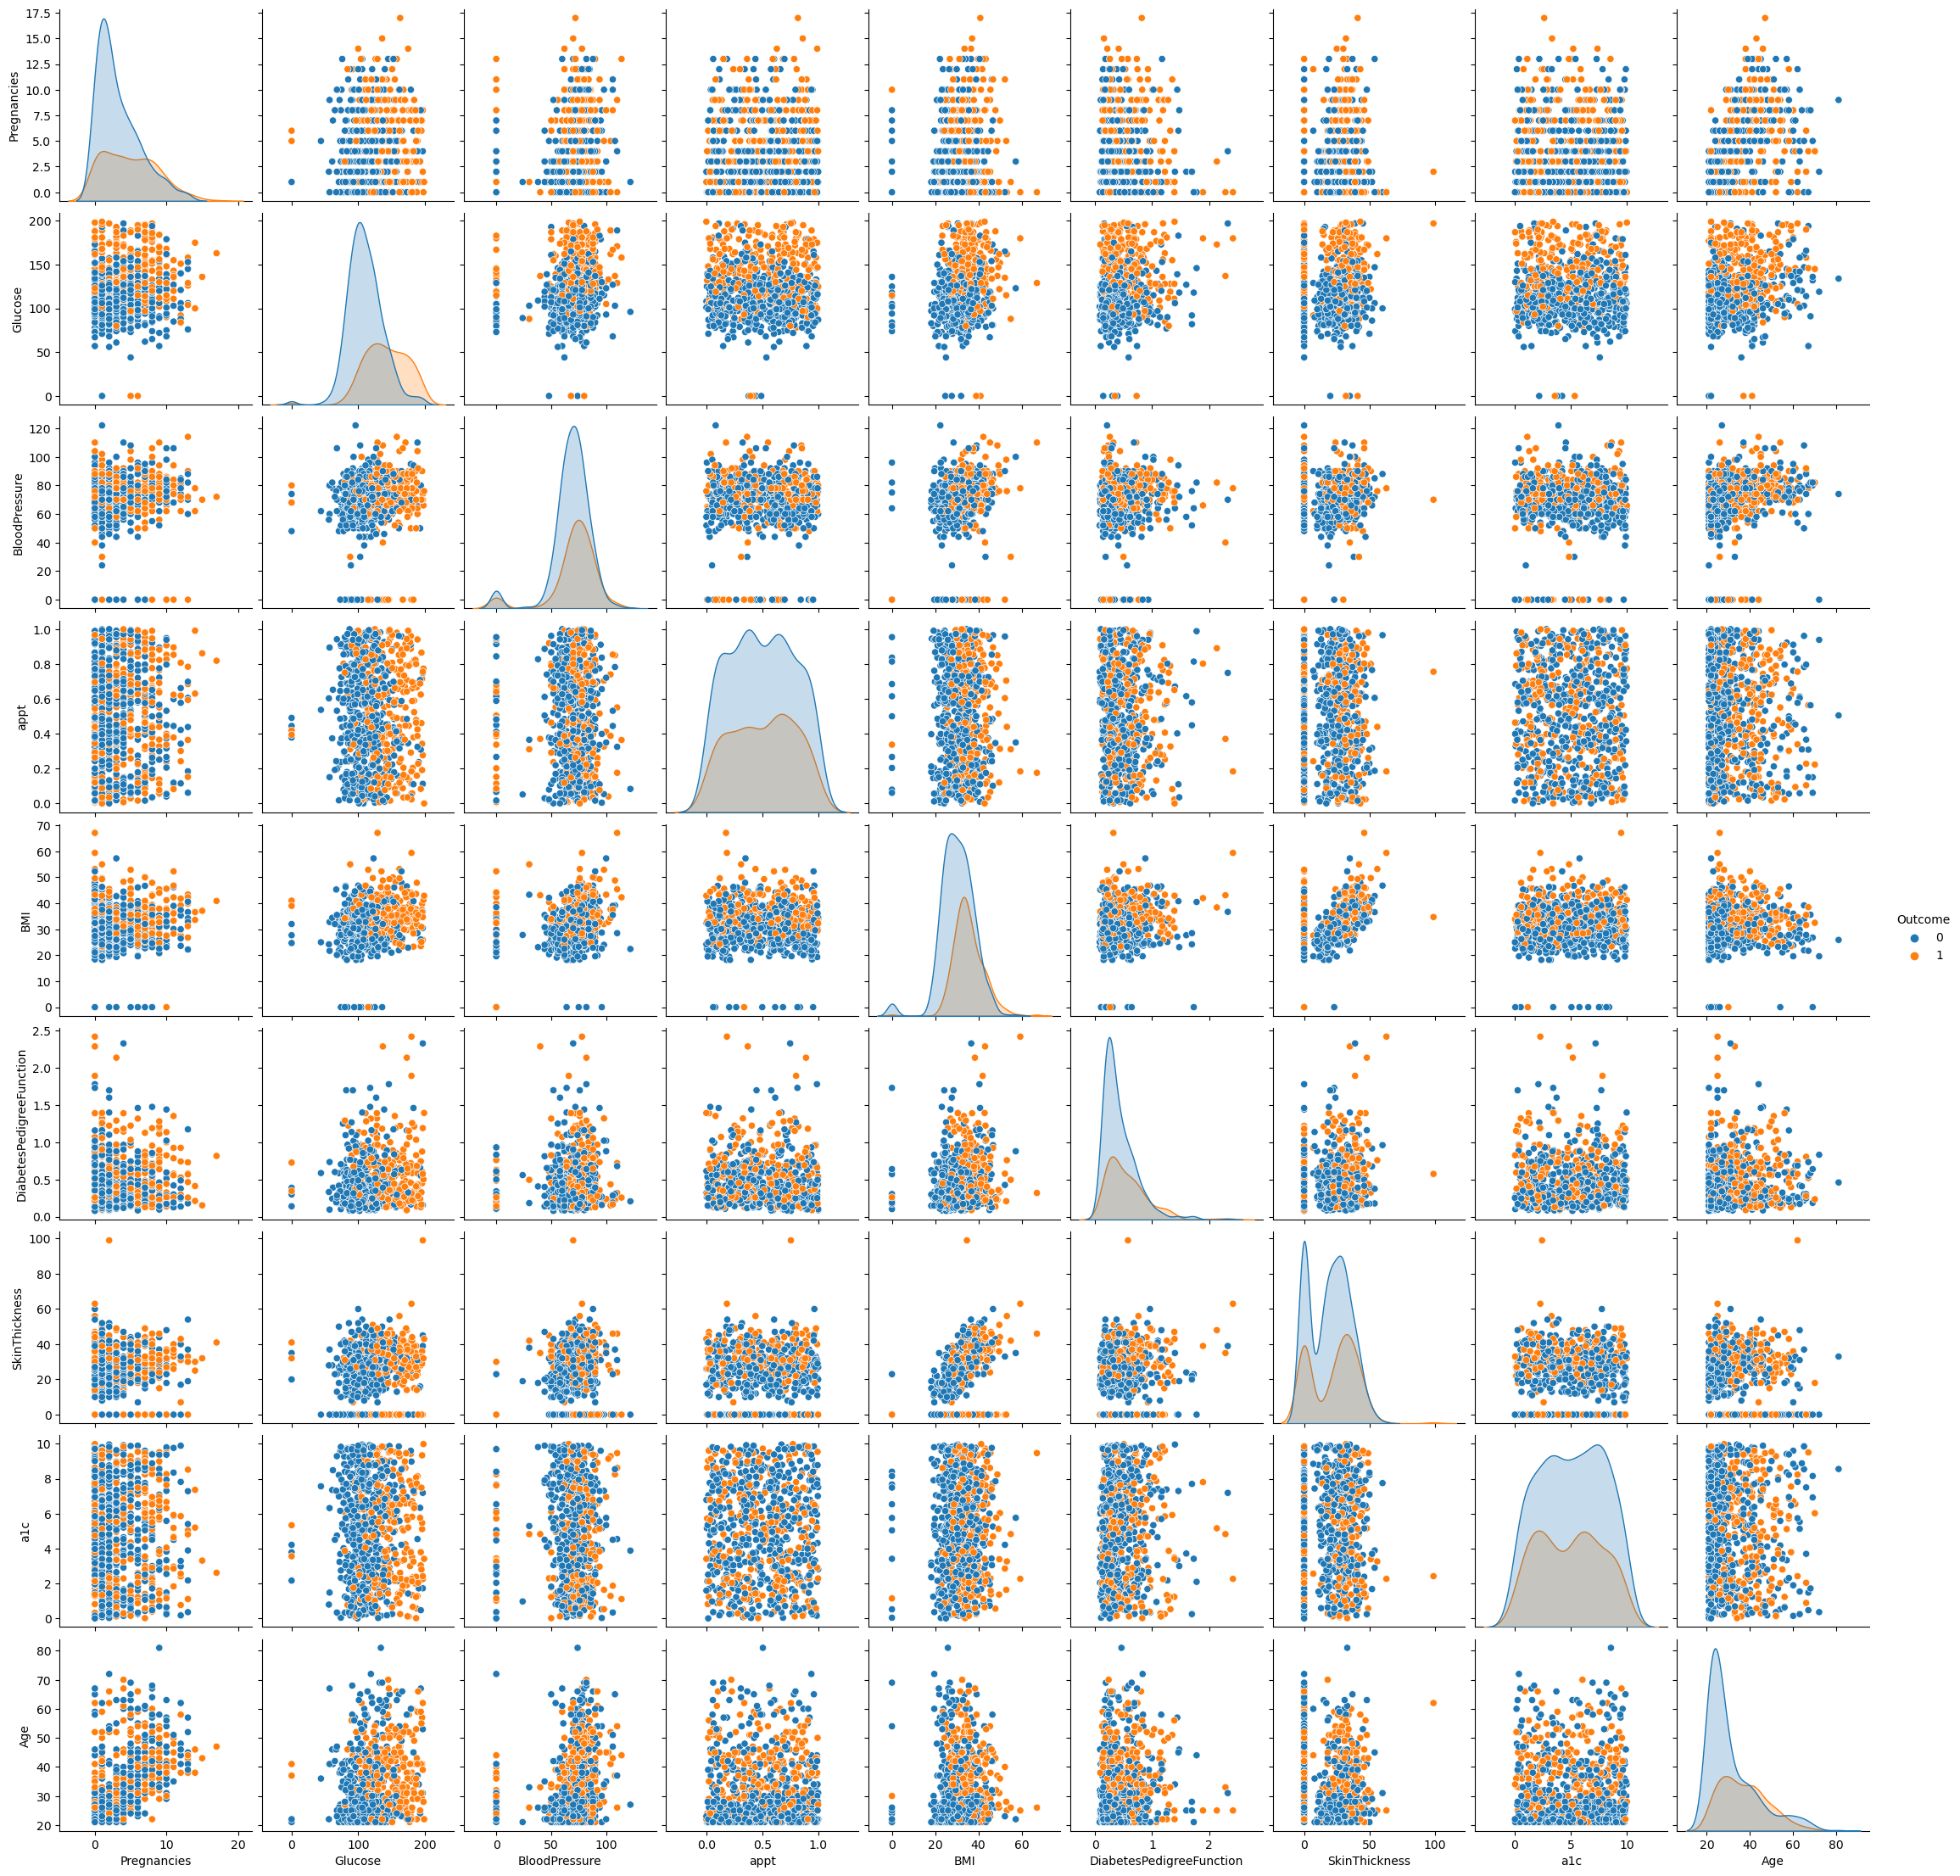

In [17]:
import seaborn as sns
sns.pairplot(diabetes_df, hue='Outcome')

# Feature Selection Methods:

### 1. Remove irrelevant features

In [18]:
diabetes_df.head(2)

Pregnancies  Glucose  BloodPressure      appt   BMI  \
0            6      148             72  0.016301  33.6   
1            1       85             66  0.344987  26.6   

   DiabetesPedigreeFunction  SkinThickness       a1c  Age  Outcome  
0                     0.627             35  9.033109   50        1  
1                     0.351             29  1.105190   31        0

### 2. Remove highly correlated independent features

In [19]:
corr_df = diabetes_df.corr()
corr_df

Pregnancies   Glucose  BloodPressure      appt  \
Pregnancies                  1.000000  0.129459       0.141282  0.015947   
Glucose                      0.129459  1.000000       0.152590 -0.005523   
BloodPressure                0.141282  0.152590       1.000000 -0.012474   
appt                         0.015947 -0.005523      -0.012474  1.000000   
BMI                          0.017683  0.221071       0.281805 -0.003747   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265 -0.005480   
SkinThickness               -0.081672  0.057328       0.207371  0.052175   
a1c                         -0.048315 -0.019358       0.036198 -0.015742   
Age                          0.544341  0.263514       0.239528 -0.007974   
Outcome                      0.229846  0.463343       0.068789  0.011301   

                               BMI  DiabetesPedigreeFunction  SkinThickness  \
Pregnancies               0.017683                 -0.033523      -0.081672   
Glucose                   0.221071                  0.137337       0.057328   
BloodPressure             0.281805                  0.041265       0.207371   
appt                     -0.003747                 -0.005480       0.052175   
BMI                       1.000000                  0.140647       0.392573   
DiabetesPedigreeFunction  0.140647                  1.000000       0.183928   
SkinThickness             0.392573                  0.183928       1.000000   
a1c                       0.020999                  0.023907       0.028821   
Age                       0.036242                  0.033561      -0.113970   
Outcome                   0.308588                  0.189205       0.088634   

                               a1c       Age   Outcome  
Pregnancies              -0.048315  0.544341  0.229846  
Glucose                  -0.019358  0.263514  0.463343  
BloodPressure             0.036198  0.239528  0.068789  
appt                     -0.015742 -0.007974  0.011301  
BMI                       0.020999  0.036242  0.308588  
DiabetesPedigreeFunction  0.023907  0.033561  0.189205  
SkinThickness             0.028821 -0.113970  0.088634  
a1c                       1.000000 -0.026813 -0.031190  
Age                      -0.026813  1.000000  0.234680  
Outcome                  -0.031190  0.234680  1.000000

In [20]:
fig = go.Figure()
fig.add_traces(go.Heatmap(z=corr_df, x=corr_df.columns, y=corr_df.columns, zmax=1, zmin=-1))
fig.update_layout({'title': 'Features Correlation Heatmap'})

### 3. For linear regression mostly - select the features that are highly correlated to the target

In [21]:
high_corr = corr_df.Outcome.iloc[0:-1].sort_values(ascending=False)
high_corr

Glucose                     0.463343
BMI                         0.308588
Age                         0.234680
Pregnancies                 0.229846
DiabetesPedigreeFunction    0.189205
SkinThickness               0.088634
BloodPressure               0.068789
appt                        0.011301
a1c                        -0.031190
Name: Outcome, dtype: float64

In [22]:
high_corr_df = pd.DataFrame({'high_corr_to_target':high_corr}, index=high_corr.index)
high_corr_df

high_corr_to_target
Glucose                              0.463343
BMI                                  0.308588
Age                                  0.234680
Pregnancies                          0.229846
DiabetesPedigreeFunction             0.189205
SkinThickness                        0.088634
BloodPressure                        0.068789
appt                                 0.011301
a1c                                 -0.031190

### 4. Univariate Selection Statistical Test
Statistical tests can be used to select the features with the strongest relationship with the output variable

In [23]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df.Outcome
X

Pregnancies  Glucose  BloodPressure      appt   BMI  \
0              6      148             72  0.016301  33.6   
1              1       85             66  0.344987  26.6   
2              8      183             64  0.378963  23.3   
3              1       89             66  0.783727  28.1   
4              0      137             40  0.370406  43.1   
..           ...      ...            ...       ...   ...   
763           10      101             76  0.205848  32.9   
764            2      122             70  0.219637  36.8   
765            5      121             72  0.639698  26.2   
766            1      126             60  0.704326  30.1   
767            1       93             70  0.486464  30.4   

     DiabetesPedigreeFunction  SkinThickness       a1c  Age  
0                       0.627             35  9.033109   50  
1                       0.351             29  1.105190   31  
2                       0.672              0  2.377655   32  
3                       0.167             23  6.783883   21  
4                       2.288             35  4.831895   33  
..                        ...            ...       ...  ...  
763                     0.171             48  0.255139   63  
764                     0.340             27  9.825770   27  
765                     0.245             23  0.589535   30  
766                     0.349              0  0.718576   47  
767                     0.315             31  4.809363   23  

[768 rows x 9 columns]

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

In [26]:
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X,y)
chi_feature = chi_selector.get_feature_names_out()
chi_feature

array(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'SkinThickness',
       'Age'], dtype=object)

In [28]:
chi_selector = SelectKBest(chi2, k=len(X.columns))
chi_selector.fit(X,y)

scores = pd.Series(chi_selector.scores_.tolist())
p_values = pd.Series(chi_selector.pvalues_.tolist())

selected_df = pd.DataFrame({'univariate_score':scores, 'p_values': p_values})
selected_df.set_index(X.columns, inplace=True, drop=True)

univariate_df = selected_df.sort_values(by='univariate_score', ascending=False)
univariate_df

univariate_score       p_values
Glucose                        1392.355592  9.628936e-305
Age                             175.754930   4.095919e-40
BMI                             141.910823   1.017139e-32
Pregnancies                     119.651895   7.539535e-28
SkinThickness                    74.664601   5.578752e-18
BloodPressure                    19.676373   9.172854e-06
DiabetesPedigreeFunction          6.387809   1.149068e-02
a1c                               1.201238   2.730743e-01
appt                              0.016086   8.990757e-01

### 5. Feature Importance

In [29]:
from xgboost import XGBClassifier

C:\Users\orsim\anaconda3\envs\TorchEnv\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [32]:
model = XGBClassifier()
model.fit(X,y)
feat_importances_df = pd.DataFrame({'feature_importance': model.feature_importances_}, index=X.columns)
feat_importances_df = feat_importances_df.sort_values(by='feature_importance', ascending=False)
feat_importances_df

[19:42:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\orsim\anaconda3\envs\TorchEnv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\orsim\anaconda3\envs\TorchEnv\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



feature_importance
Glucose                             0.245433
BMI                                 0.133080
Age                                 0.127865
DiabetesPedigreeFunction            0.093353
Pregnancies                         0.088347
a1c                                 0.083568
SkinThickness                       0.077095
BloodPressure                       0.075755
appt                                0.075505

## Split & Scale

In [33]:
# scale the training set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=diabetes_df.columns[0:-1])
scaled_X.head()

Pregnancies   Glucose  BloodPressure      appt       BMI  \
0     0.639947  0.848324       0.149641 -1.689112  0.204013   
1    -0.844885 -1.123396      -0.160546 -0.541185 -0.684422   
2     1.233880  1.943724      -0.263941 -0.422525 -1.103255   
3    -0.844885 -0.998208      -0.160546  0.991104 -0.494043   
4    -1.141852  0.504055      -1.504687 -0.452409  1.409746   

   DiabetesPedigreeFunction  SkinThickness       a1c       Age  
0                  0.468492       0.907270  1.415053  1.425995  
1                 -0.365061       0.530902 -1.376878 -0.190672  
2                  0.604397      -1.288212 -0.928761 -0.105584  
3                 -0.920763       0.154533  0.622956 -1.041549  
4                  5.484909       0.907270 -0.064465 -0.020496

In [34]:
# train tests split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=.3,random_state=1234)

train_df = pd.merge(left=X_train, right=y_train, left_index = True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index = True, right_index=True)

train_df.head(10)


Pregnancies   Glucose  BloodPressure      appt       BMI  \
113     0.046014 -1.405071      -0.367337 -1.223616  0.254780   
395    -0.547919  0.191084      -0.574128  0.403311 -0.544811   
453    -0.547919 -0.059293      -3.572597  1.531638 -1.572857   
401     0.639947  0.504055      -0.419034 -1.518539 -0.989028   
245     1.530847  1.975021       0.821712  1.128750 -0.252897   
378     0.046014  1.098701       0.304734  0.946435  2.069726   
605    -0.844885  0.097192      -0.470732 -0.634560  0.483235   
348    -0.250952 -0.685236      -0.367337 -0.164473 -1.293634   
13     -0.844885  2.131507      -0.470732 -0.261752 -0.240205   
57     -1.141852 -0.653939       0.976805  1.624735  1.879347   

     DiabetesPedigreeFunction  SkinThickness       a1c       Age  Outcome  
113                 -0.244256      -1.288212  0.068384 -0.701198        0  
395                  3.407067       0.217261 -0.455060 -0.701198        0  
453                  1.087616      -1.288212 -1.635896  3.297926        0  
401                 -0.969085      -1.288212 -0.561525  1.851434        0  
245                  2.238282      -0.347291  0.514738  1.340908        1  
378                 -0.706334      -1.288212  0.267622 -0.105584        1  
605                  0.127219       0.719086  0.982007 -1.041549        0  
348                 -0.582509      -0.096379 -0.566302 -0.616111        0  
13                  -0.223115       0.154533  0.893939  2.191785        1  
57                   1.480232       2.475471  0.963590 -0.190672        0

# Model

### Univariate recommended features

In [35]:
X_train.head(1)

Pregnancies   Glucose  BloodPressure      appt      BMI  \
113     0.046014 -1.405071      -0.367337 -1.223616  0.25478   

     DiabetesPedigreeFunction  SkinThickness       a1c       Age  
113                 -0.244256      -1.288212  0.068384 -0.701198

In [36]:
uni_X_train = X_train[univariate_df.index.to_list()[:6]]
uni_X_test = X_test[univariate_df.index.to_list()[:6]]
uni_X_test.head(3)

Glucose       Age       BMI  Pregnancies  SkinThickness  BloodPressure
200 -0.247076 -1.041549 -0.125977    -1.141852      -0.284563       0.563223
40   1.849832 -0.616111  0.254780    -0.250952       0.279989      -0.263941
630 -0.215779  0.064591 -0.582887     0.936914      -1.288212      -0.263941

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
uni_logmodel = LogisticRegression()
uni_logmodel.fit(uni_X_train, y_train)

LogisticRegression()

In [40]:
uni_probability = uni_logmodel.predict_proba(uni_X_test)
uni_prediction = uni_logmodel.predict(uni_X_test)

y_test_prob_0 = pd.Series(uni_probability[:,0], name='probability_0', index=y_test.index)
y_test_prob_1 = pd.Series(uni_probability[:,1], name='probability_1', index=y_test.index)
y_test_pred = pd.Series(uni_prediction, name='prediction', index=y_test.index)

uni_test_results = pd.DataFrame(data={'probability_0': y_test_prob_0, 'probability_1': y_test_prob_1, 
                                      'prediction': y_test_pred, 'actual':y_test})
uni_test_results.head(10)

probability_0  probability_1  prediction  actual
200       0.888480       0.111520           0       0
40        0.246510       0.753490           1       0
630       0.742474       0.257526           0       1
356       0.713799       0.286201           0       1
305       0.664116       0.335884           0       0
267       0.569324       0.430676           0       0
351       0.652303       0.347697           0       0
644       0.902589       0.097411           0       0
759       0.111614       0.888386           1       1
157       0.908709       0.091291           0       0

In [41]:
uni_correct_rows = len(uni_test_results.loc[uni_test_results.prediction == uni_test_results.actual])
accuracy = round(uni_correct_rows/len(uni_test_results), 3)
accuracy

0.797

### XGBClassifier recommended features

In [42]:
imp_X_train = X_train[feat_importances_df.index.to_list()[:6]]
imp_X_test = X_test[feat_importances_df.index.to_list()[:6]]
imp_X_test.head(3)

Glucose       BMI       Age  DiabetesPedigreeFunction  Pregnancies  \
200 -0.247076 -0.125977 -1.041549                  1.214461    -1.141852   
40   1.849832  0.254780 -0.616111                 -0.606670    -0.250952   
630 -0.215779 -0.582887  0.064591                  0.785604     0.936914   

          a1c  
200  1.487534  
40   1.396599  
630  1.397631

In [43]:
imp_logmodel = LogisticRegression()
imp_logmodel.fit(imp_X_train, y_train)

LogisticRegression()

In [44]:
imp_probability = imp_logmodel.predict_proba(imp_X_test)
imp_prediction = imp_logmodel.predict(imp_X_test)

y_test_prob_0 = pd.Series(imp_probability[:,0], name='probability_0', index=y_test.index)
y_test_prob_1 = pd.Series(imp_probability[:,1], name='probability_1', index=y_test.index)
y_test_pred = pd.Series(imp_prediction, name='prediction', index=y_test.index)

imp_test_results = pd.DataFrame(data={'probability_0': y_test_prob_0, 'probability_1': y_test_prob_1, 
                                      'prediction': y_test_pred, 'actual':y_test})
imp_test_results.head(10)

probability_0  probability_1  prediction  actual
200       0.814668       0.185332           0       0
40        0.327543       0.672457           1       0
630       0.719650       0.280350           0       1
356       0.613975       0.386025           0       1
305       0.699954       0.300046           0       0
267       0.420616       0.579384           1       0
351       0.667808       0.332192           0       0
644       0.861112       0.138888           0       0
759       0.121873       0.878127           1       1
157       0.870926       0.129074           0       0

In [45]:
imp_correct_rows = len(imp_test_results.loc[imp_test_results.prediction == imp_test_results.actual])
accuracy = round(imp_correct_rows/len(imp_test_results), 3)
accuracy

0.784

# Evaluation of a classification model

## Confusion Matrix

In [46]:
from sklearn import metrics

In [51]:
# first argument: True value, second argument: Predicted value
y_test_pred = uni_test_results.prediction
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[140,  15],
       [ 32,  44]], dtype=int64)

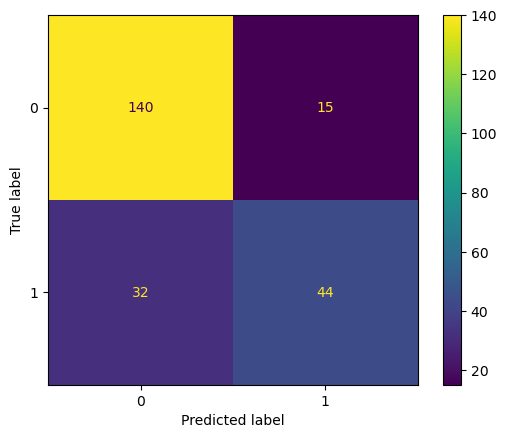

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion, display_labels=uni_logmodel.classes_)
disp.plot()

#### 1. Accuracy: (TP+TN)/(TP+TN+FP+FN)

In [54]:
print(metrics.accuracy_score(y_test,y_test_pred))

0.7965367965367965


#### 2. Precision
When a positive value is predicted, how often is the prediction correct?

In [55]:
print(metrics.precision_score(y_test,y_test_pred))

0.7457627118644068


#### 3. Sensitivity AKA Recall:
When the actual value is positive, how often is the prediction correct?

TP/(TP+FN)

In [58]:
recall = metrics.recall_score(y_test, y_test_pred)
print(recall)

0.5789473684210527


#### 4. Specifity
When the actual value is negative, how often is the prediction correct?

TN/(TN+FP)

#### 5. F1 score

F1 = 2 * (precision*recall) / (precision+recall)

## Classification Report

In [59]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       155
           1       0.75      0.58      0.65        76

    accuracy                           0.80       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.80      0.79       231

